<H1>Marco teórico: Árboles de Decisión y Random Forest </H1>

### **Conceptos Clave:**

#### **Árboles de Decisión**

Los **árboles de decisión** son modelos de aprendizaje supervisado utilizados tanto para clasificación como para regresión. Se estructuran en forma de árbol, con tres componentes principales: nodos, ramas y hojas.

- **Nodo:** Un nodo en un árbol de decisión representa una prueba en una característica. Es donde se decide cómo dividir los datos. Hay dos tipos de nodos:
  - **Nodo Interno:** Representa una prueba en una característica que divide los datos en función del valor de la característica.
  - **Nodo Raíz:** Es el nodo superior del árbol, desde donde comienza la división de los datos.
  
- **Rama:** Una rama conecta un nodo con otros nodos o hojas. Representa el resultado de la prueba realizada en el nodo anterior.

- **Hoja:** Una hoja es el nodo terminal del árbol, donde se realiza la predicción final. En un árbol de clasificación, representa una etiqueta de clase; en un árbol de regresión, representa un valor numérico.

1. **Árboles de Decisión para Clasificación**

- **Definición:**
  Un árbol de decisión para clasificación asigna una etiqueta de clase a una instancia basándose en sus características.

- **Criterio de Impureza:**
  - **Entropía:** Mide la incertidumbre o impureza en un nodo. La fórmula para la entropía es:
    $
    \text{Entropía} = - \sum_{i=1}^{c} p_i \log_2(p_i)
    $
    donde $p_i$ es la probabilidad de la clase $i$ en el nodo, y $c$ es el número total de clases.
  - **Índice de Gini:** Mide la pureza del nodo. Se calcula como:

    $
    \text{Índice de Gini} = 1 - \sum_{i=1}^{c} p_i^2
    $
    
    donde $p_i$ es la proporción de instancias de la clase $i$ en el nodo.

2. **Árboles de Decisión para Regresión**

- **Definición:**
  Un árbol de decisión para regresión predice un valor continuo en lugar de una etiqueta de clase.

- **Criterio de Impureza:**
  - **Varianza:** Mide la dispersión de los valores objetivo en un nodo. La fórmula para la varianza es:
    $
    \text{Varianza} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
    $
    donde $y_i$ es el valor objetivo de la instancia $i$, $\bar{y}$ es la media de los valores objetivos en el nodo, y $n$ es el número de instancias en el nodo.

    En el contexto de los árboles de decisión para regresión, la **impureza** se mide por la varianza de los valores de salida. Un nodo con baja varianza (baja impureza) indica que los valores de salida están más concentrados alrededor de la media, lo que implica una mejor calidad en la predicción.

### **Ensembles: Random Forest**

Un **Random Forest** es un modelo de ensamblaje que combina múltiples árboles de decisión para mejorar la precisión y robustez del modelo.

**1. **Conceptos Clave**

- **Composición:**
  - Un Random Forest está compuesto por múltiples árboles de decisión, cada uno entrenado con un subconjunto aleatorio de los datos (muestreo con reemplazo) y un subconjunto aleatorio de características (subespacio de características).

- **Predicción:**
  - Para **clasificación**, la predicción final se obtiene por mayoría de votos entre todos los árboles:

    $
    \text{Predicción Final} = \text{modo}\left(\text{predicción}_1, \text{predicción}_2, \ldots, \text{predicción}_{n_{\text{trees}}}\right)
    $
    
  - Para **regresión**, la predicción final es el promedio de las predicciones de todos los árboles:

    $
    \text{Predicción Final} = \frac{1}{n_{\text{trees}}} \sum_{i=1}^{n_{\text{trees}}} \text{predicción}_i
    $

**2. **Importancia de Características**

El Random Forest calcula la importancia de cada característica en la predicción mediante la reducción de impureza. La importancia de una característica se basa en la disminución media de impureza que se logra al dividir en nodos con esa característica.

- **Reducción de Impureza:** Para una característica dada, se calcula la reducción de impureza como la diferencia entre la impureza promedio de los nodos antes y después de la división usando esa característica. Esto se puede calcular como:

  - **Impureza Antes de la División:** Es la impureza promedio en el nodo padre antes de la división. En clasificación, puede ser la entropía o el índice de Gini. En regresión, es la varianza. Se calcula como:

    $
    \text{Impureza Antes} = \frac{\sum_{i=1}^{m} I_i \cdot w_i}{\sum_{i=1}^{m} w_i}
    $
    
    donde $I_i$ es la impureza en el nodo $i$, y $w_i$ es el peso o el número de instancias en el nodo $i$, y $m$ es el número de nodos.

  - **Impureza Después de la División:** Es la impureza ponderada de los nodos hijos después de la división. Para un nodo hijo $j$ con impureza $I_j$ y peso $w_j$ (número de instancias en el nodo hijo $j$), la impureza promedio se calcula como:

    $
    \text{Impureza Después} = \frac{\sum_{j=1}^{k} I_j \cdot w_j}{\sum_{j=1}^{k} w_j}
    $
    
    donde $k$ es el número de nodos hijos.

  - **Reducción de Impureza:**
    $
    \text{Reducción de Impureza} = \text{Impureza Antes} - \text{Impureza Después}
    $

    La reducción de impureza mide el beneficio de dividir los datos en función de una característica. Una mayor reducción indica que la característica es importante para la predicción.

### **Selección de Hiperparámetros**

Los hiperparámetros del Random Forest son cruciales para ajustar el rendimiento del modelo. Entre los principales hiperparámetros se encuentran:

- **n_estimators:** Número de árboles en el bosque. Un mayor número de árboles puede mejorar la precisión, pero aumenta el tiempo de cómputo.

- **max_features:** Número máximo de características a considerar para la mejor división en cada árbol. Puede ser un número entero, un porcentaje del total de características, o valores predeterminados como `'auto'`, `'sqrt'`, `'log2'`.

- **max_depth:** Profundidad máxima de los árboles. Limitar la profundidad puede ayudar a evitar el sobreajuste.

- **min_samples_split:** Número mínimo de muestras necesarias para dividir un nodo interno. Un valor mayor puede evitar divisiones que no aportan valor significativo.

- **min_samples_leaf:** Número mínimo de muestras en un nodo hoja. Aumentar este valor puede ayudar a suavizar el modelo y evitar el sobreajuste.

- **bootstrap:** Indica si se utiliza muestreo con reemplazo para construir los árboles. Si es `False`, se utiliza todo el conjunto de datos para cada árbol.

### **Conclusión**

Los árboles de decisión y el Random Forest son herramientas efectivas para tareas de clasificación y regresión. La comprensión de los conceptos fundamentales como nodos, ramas y hojas, los criterios de impureza, y la estructura de los árboles, junto con el uso de técnicas de ensamblaje como Random Forest, permite construir modelos más precisos y robustos. La correcta selección de hiperparámetros es esencial para optimizar el rendimiento del modelo.

<H1>Módulo 7: Árboles de Decisión y Random Forest </H1>

**Conceptos clave:**
Árboles de decisión para clasificación y regresión.

Ensembles: Random Forest.

Importancia de características y selección de hiperparámetros.

**Proyecto:** Detección de fraudes con Random Forest.
Utilizar un dataset de transacciones para entrenar un Random Forest y detectar fraudes financieros. Análisis de importancia de las variables.

**Proyecto Completo: Detección de Fraudes con Árboles de Decisión y Random Forest**

**1. Preparación del Entorno**
Instala las librerías necesarias si aún no lo has hecho:

In [2]:
#!pip install pandas scikit-learn matplotlib seaborn requests

**2. Importar Librerías**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import requests
from io import StringIO

**3. Descargar y Cargar el Dataset**

Aquí se descarga el dataset directamente desde la web y se carga en un DataFrame de pandas.

In [16]:
# URL del dataset (creditcard.csv en formato CSV accesible)
url = '/home/julio/jupyter_files/Curso_ML/card_transdata.csv'


# Cargar el dataset en un DataFrame
df = pd.read_csv(url)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


**4. Exploración Inicial y Preprocesamiento**

Revisar y preparar los datos.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# Revisar los primeros registros
print(df.head())

# Dividir en características y variable objetivo
X = df.drop('fraud', axis=1)  # Características
y = df['fraud']  # Variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


**5. Creación del Pipeline**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Crear el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

**6. Entrenamiento y Evaluación del Modelo**

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



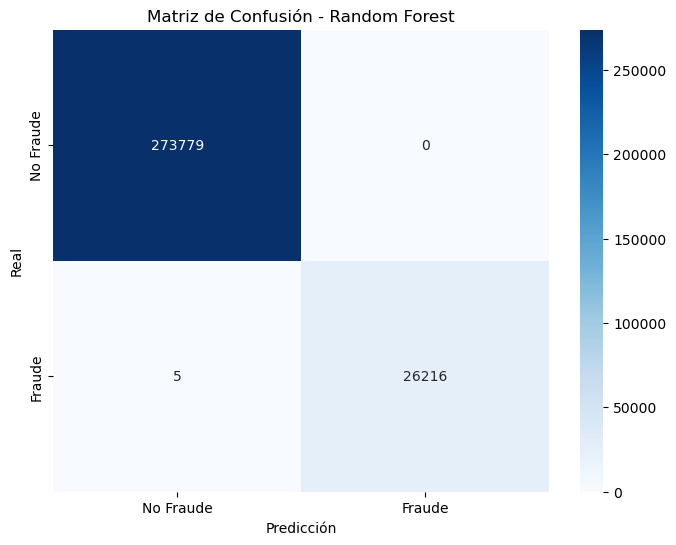

In [21]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)

# Reporte de clasificación para Random Forest
print("Reporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred))

# Matriz de confusión para Random Forest
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

**7. Análisis de Importancia de Características**

In [22]:
# Obtener el modelo Random Forest desde el pipeline
rf_model = pipeline.named_steps['classifier']

# Obtener la importancia de las características del Random Forest
importances = rf_model.feature_importances_
features = X.columns

In [23]:
# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Importancia de Características - Random Forest:
                          Feature  Importance
2  ratio_to_median_purchase_price    0.526900
6                    online_order    0.170429
0              distance_from_home    0.132397
5                 used_pin_number    0.062964
4                       used_chip    0.054264
1  distance_from_last_transaction    0.046277
3                 repeat_retailer    0.006769


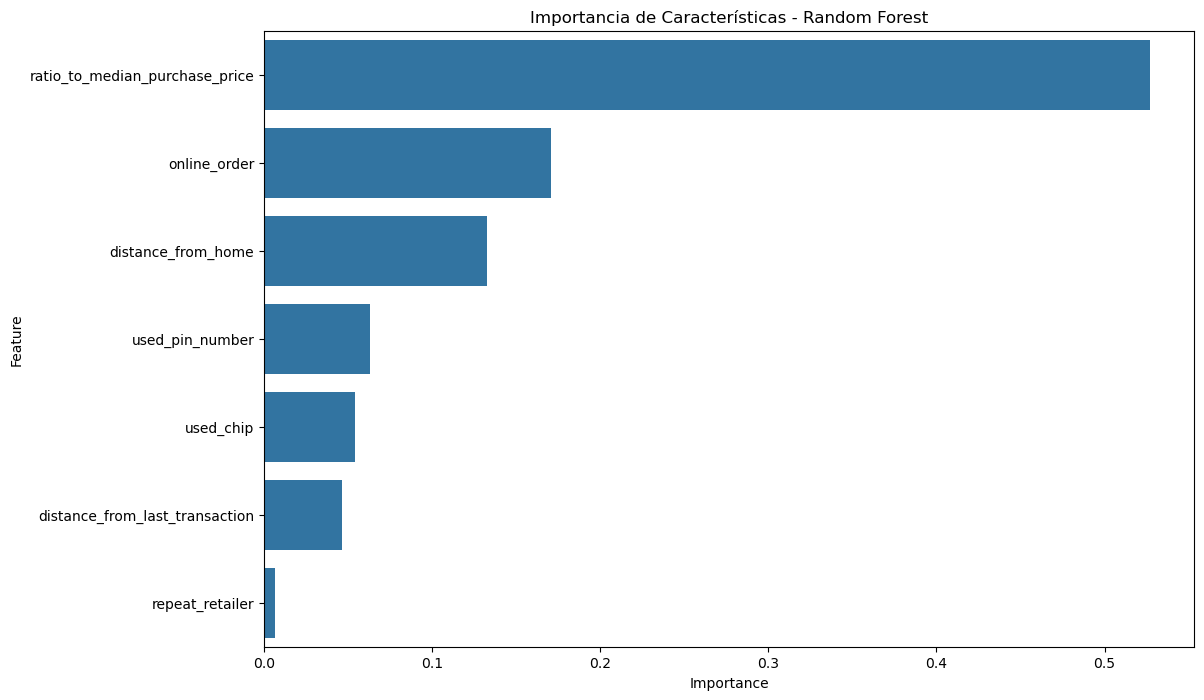

In [24]:
# Mostrar la importancia de las características
print("Importancia de Características - Random Forest:")
print(importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de Características - Random Forest')
plt.show()